# 규제 선형 모델 - 릿지,라쏘,엘라스틱넷

## 규제 선형 모델의 개요
- class9의 Degree가 1인 경우는 지나치게 예측 곡선을 단순화해 데이터에 적합하지 않는 과소적합 모델을 만들었다
- Degree 15의 경우는 지나치게 모든 데이터에 적합한 회귀식을 만들기 위해서 다항식이 복잡해지고 회귀계수가 매우 크게 설정이 되면서 평가 데이터 세트에 대해서 형편없는 예측 성능을 보임
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있다.
#### - "학습 데이터 잔차 오류 최소화" + "회귀계수 크기 제어" 가 필요

## 1. 릿지회귀(Ridge Regression)

### 릿지 회귀의 손실함수
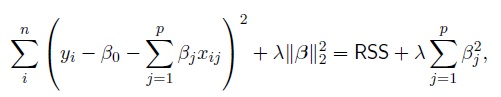

- 앞부분의 기존의 잔차 최소제곱법에서 사용하던 손실함수이다.
- 뒤에 파트는 무작정 회귀 계수가 커지는 것을 막기위한 규제(Reguralization)이다.
- 여기서 lambda는 규제가 모델에 영향력을 주는 정도를 조절해주는 파라미터이다 
- 만약 lambda가 0 에 가깝다면 회귀계수는 기존 회귀(OLS)와 비슷한 값을 가질것이다. 
- 반면 lambda가 매우 큰값이라면 뒤의 항의 영향이 커져서 회귀계수들을 0으로 만들어야한다.
- 즉 lambda가 커지면 과적합을 방지할 수 있으며
- lambda가 작아질수록 데이터에 적합시킬 수 있다. 
- 위와 같은 규제를 L2 규제라고 한다


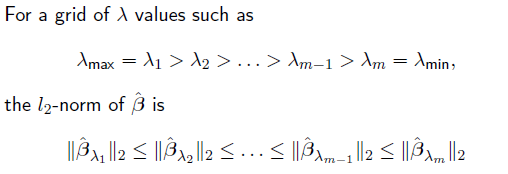

### 릿지 회귀 구현

#### 사이킷런의 Ridge 클래스 사용
#### 주요 파라미터는 alpha(위의 식의 lambda)

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target

# 설명변수 , 예측변수 분리
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)

# cross_validation으로 Ridge(alpha=10)의 성능을 살펴본다
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 MSE scores: ', np.round(-neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 MSE scores:  [11.422 24.294 28.144 74.599 28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


### alpha값을 0, 0.1, 1, 10, 100으로 변경하면서 RMSE 측정
#### 일종의 하이퍼 파라미터 튜닝

In [10]:
# alpha에 따른 ridge 모델 생성
ridge_0=Ridge(alpha=0)
ridge_01=Ridge(alpha=0.1)
ridge_1=Ridge(alpha=1)
ridge_10=Ridge(alpha=10)
ridge_100=Ridge(alpha=100)

# cross_validation으로 neg_mean_squared_error 생성
neg_mse_scores_0= cross_val_score(ridge_0, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
neg_mse_scores_01= cross_val_score(ridge_01, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
neg_mse_scores_1= cross_val_score(ridge_1, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
neg_mse_scores_10= cross_val_score(ridge_10, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
neg_mse_scores_100= cross_val_score(ridge_100, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)

# 평균 RMSE 구하기
avg_rmse_0 = round(np.mean(np.sqrt(-1 * neg_mse_scores_0)),4)
avg_rmse_01 = round(np.mean(np.sqrt(-1 * neg_mse_scores_01)),4)
avg_rmse_1 = round(np.mean(np.sqrt(-1 * neg_mse_scores_1)),4)
avg_rmse_10 = round(np.mean(np.sqrt(-1 * neg_mse_scores_10)),4)
avg_rmse_100 = round(np.mean(np.sqrt(-1 * neg_mse_scores_100)),4)

# 출력
print('alpha=0 일 때 5 folds 의 평균 RMSE : ',avg_rmse_0)
print('alpha=0.1 일 때 5 folds 의 평균 RMSE : ',avg_rmse_01)
print('alpha=1 일 때 5 folds 의 평균 RMSE : ',avg_rmse_1)
print('alpha=10 일 때 5 folds 의 평균 RMSE : ',avg_rmse_10)
print('alpha=100 일 때 5 folds 의 평균 RMSE : ',avg_rmse_100)

alpha=0 일 때 5 folds 의 평균 RMSE :  5.8287
alpha=0.1 일 때 5 folds 의 평균 RMSE :  5.7885
alpha=1 일 때 5 folds 의 평균 RMSE :  5.6526
alpha=10 일 때 5 folds 의 평균 RMSE :  5.5182
alpha=100 일 때 5 folds 의 평균 RMSE :  5.3296


- 규제가 있을 때 오히려 RMSE가 줄어드는 것을 볼 수 있다. 
- 과적합이 방지되었음으로 생각된다.

### 각 alpha에 따른 회귀 계수 값을 시각화
#### 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

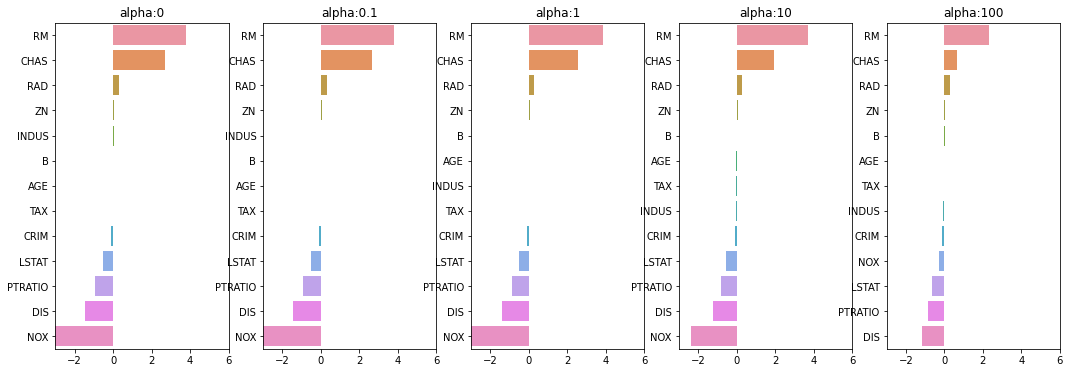

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

#### alpha값에 따른 컬럼별 회귀계수 출력

In [15]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


- alpha 값을 계속 증가시킬수록 회귀 계수 절댓값은 지속적으로 작아짐을 알 수 있다.
- 특히 NOX 변수는 alpha값에 따라 회귀 계수가 크게 감소함을 볼 수 있다. 
- 하지만 릿지 회귀의 경우에는 회귀계수를 0으로 만들지는 않는다

## 2. 라쏘 회귀


### 라쏘 회귀의 손실함수

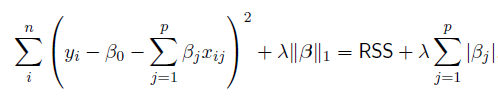

- 라쏘는 릿지와 다르게 L1 규제를 사용한다
- L2 규제는 회귀계수를 감소시키지만 0으로 만들지는 않는다.
- 반면 L1 규제는 불필요한 회귀계수를 급격하게 감소시켜 0으로 만들고 제거한다
### - 즉, L1 규제는 lambda의 값에 따라 적절한 변수만을 선택하는 기능이 있다. 


### 라쏘 회귀 구현

In [17]:
from sklearn.linear_model import Lasso, ElasticNet
#alpha_Lasso 는 [0.07,0.1,0.5,1,3]으로 한다

# alpha에 따른 Lasso 모델 생성
Lasso_007=Lasso(alpha=0.07)
Lasso_01=Lasso(alpha=0.1)
Lasso_05=Lasso(alpha=0.5)
Lasso_1=Lasso(alpha=1)
Lasso_3=Lasso(alpha=3)

# cross_validation으로 neg_mean_squared_error 생성
neg_mse_scores_007= cross_val_score(Lasso_007, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
neg_mse_scores_01= cross_val_score(Lasso_01, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
neg_mse_scores_05= cross_val_score(Lasso_05, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
neg_mse_scores_1= cross_val_score(Lasso_1, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
neg_mse_scores_3= cross_val_score(Lasso_3, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)

# 평균 RMSE 구하기
avg_rmse_007 = round(np.mean(np.sqrt(-1 * neg_mse_scores_007)),4)
avg_rmse_01 = round(np.mean(np.sqrt(-1 * neg_mse_scores_01)),4)
avg_rmse_05 = round(np.mean(np.sqrt(-1 * neg_mse_scores_05)),4)
avg_rmse_1 = round(np.mean(np.sqrt(-1 * neg_mse_scores_1)),4)
avg_rmse_3 = round(np.mean(np.sqrt(-1 * neg_mse_scores_3)),4)

# 출력
print('alpha=0.07 일 때 5 folds 의 평균 RMSE : ',avg_rmse_007)
print('alpha=0.1 일 때 5 folds 의 평균 RMSE : ',avg_rmse_01)
print('alpha=0.5 일 때 5 folds 의 평균 RMSE : ',avg_rmse_05)
print('alpha=1 일 때 5 folds 의 평균 RMSE : ',avg_rmse_1)
print('alpha=3 일 때 5 folds 의 평균 RMSE : ',avg_rmse_3)

alpha=0.07 일 때 5 folds 의 평균 RMSE :  5.6123
alpha=0.1 일 때 5 folds 의 평균 RMSE :  5.6151
alpha=0.5 일 때 5 folds 의 평균 RMSE :  5.6691
alpha=1 일 때 5 folds 의 평균 RMSE :  5.776
alpha=3 일 때 5 folds 의 평균 RMSE :  6.1888


- 라쏘에서는 alpha=0.07에서 RMSE가 가장 좋음을 볼 수 있다.

### 참고
#### 회귀 계수의 움직임을 보기위해 조금은 복잡한 함수를 생성
#### 결과확인용


In [19]:

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [20]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)


#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [21]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 릿지와 다르게 L1규제에 의해서 0으로 수렴하는 회귀계수가 있음을 볼 수 있다

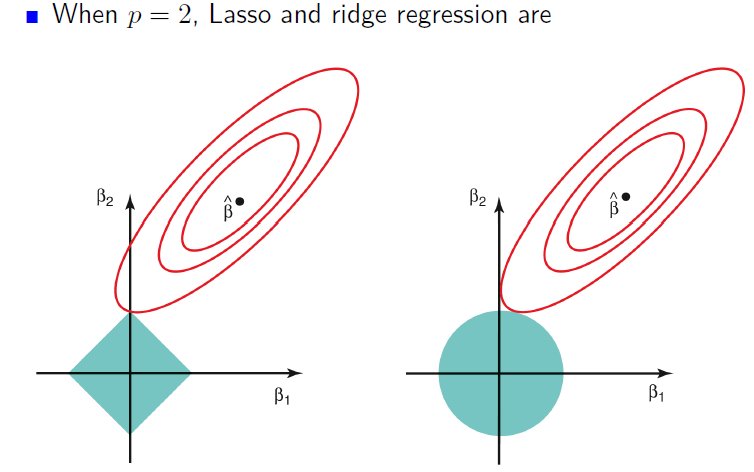

## 3. 엘라스틱넷 회귀(Elastic Net Regression)
### L2규제와 L1 규제를 결합한 회귀이다.
- 라쏘회귀가 피처 선택의 성향이 너무 강해 이를 완화하기 위해 L2 규제를 결합한 것

### 엘라스틱넷 회귀의 규제 
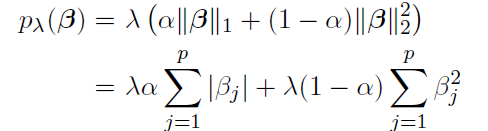

- alpha는 0과 1사이의 숫자로 L2규제와 L1규제의 비율을 조정해준다
- L1규제가 클수록 라쏘회귀에 가깝고
- L2 규제가 클수록 릿지회귀에 가까운 성질을 가진다.
- 기존의 라쏘 & 릿지 회귀와 동일하게 패널티의 정도를 결정하는 lambda도 튜닝해야하며
- L2 규제와 L1규제의 비율을 조정하는 alpha역시 조정해야한다.

In [24]:
from sklearn.linear_model import ElasticNet

# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [23]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 4. 선형 회귀 모델을 위한 데이터 변환

- 선형회귀는 일반적으로 피처와 타깃값 간에 선형관계가 있다고 가정하고 이러한 최적의 선형함수를 찾아낸다
- 또한 선형회귀는 피처값과 타깃 값의 분포가 정규분포형태를 매우 선호
- 스케일링 / 정규화 작업을 수행해야한다. 


### 피처 데이터 세트에 적용하는 변환 작업

- StandardScaler 클래스를 이용 -> 평균이 0, 분산이 1인 표준 형태로 변환
- MinMaxScaler 클래스를 이용 ->최솟값이 0이고, 최댓값이 1인 값으로 정규화
- 다항식을 대입해 비선형 부분을 잡아냄
- 원래 형태의 데이터에 log함수를 적용하여 정규분포에 가깝게 변환 : log변환
- 타깃값(y)의 경우에는 일반적으로 로그 변환을 적용

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [26]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMS

## 데이터의 특성에 맞게 변환을 해줌에 따라 모델의 성능이 향상된 것을 볼 수 있다.